In [1]:
#한글
import matplotlib
from matplotlib import font_manager, rc
font_loc = "C:/Windows/Fonts/malgunbd.ttf"
font_name = font_manager.FontProperties(fname=font_loc).get_name()
matplotlib.rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus'] = False

%matplotlib inline


In [2]:
import mglearn
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.linear_model import Ridge   # 릿지회귀
import pandas as pd


In [3]:
### 데이터 셋 준비 
boston = load_boston()  # 데이터 셋 불러오기
print(type(boston.target), type(boston.data))
print(boston.target.shape, boston.data.shape)

df_boston = pd.DataFrame(boston.data,columns=boston.feature_names)
df_boston['target'] = pd.Series(boston.target)
df_boston.head()

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(506,) (506, 13)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
X = df_boston.loc[:, 'CRIM':'LSTAT']         # 입력 데이터 
y = boston.target

print("정규화,확장 전 데이터 셋 : ", X.shape, y.shape)


정규화,확장 전 데이터 셋 :  (506, 13) (506,)


In [6]:
nor_X = MinMaxScaler().fit_transform(X)  # 입력 데이터 정규화
ex_X = PolynomialFeatures(degree=2, include_bias=False).fit_transform(nor_X)  # 데이터 feature 추가 생성

print("정규화, 추가 생성 : ", ex_X.shape, y.shape)


정규화, 추가 생성 :  (506, 104) (506,)


In [7]:
from sklearn.linear_model import LinearRegression


In [8]:
X_train, X_test, y_train, y_test = train_test_split(ex_X, y, random_state=42)
lr = LinearRegression().fit(X_train, y_train)

print("훈련 데이터 세트 점수 : {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 데이터 세트 점수 : {:.2f}".format(lr.score(X_test, y_test)))


훈련 데이터 세트 점수 : 0.94
테스트 데이터 세트 점수 : 0.78


In [9]:
# from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)
print(ridge)
print("훈련 세트 점수 : {:.2f}".format(ridge.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(ridge.score(X_test, y_test)))


Ridge()
훈련 세트 점수 : 0.87
테스트 세트 점수 : 0.81


In [12]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print(ridge10)
print("훈련 세트 점수 : {:.2f}".format(ridge10.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(ridge10.score(X_test, y_test)))



Ridge(alpha=10)
훈련 세트 점수 : 0.77
테스트 세트 점수 : 0.73


In [11]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print(ridge01)
print("훈련 세트 점수 : {:.2f}".format(ridge01.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(ridge01.score(X_test, y_test)))


Ridge(alpha=0.1)
훈련 세트 점수 : 0.92
테스트 세트 점수 : 0.82


In [13]:
ridge_p = [10, 1, 0.1, 0.01]

for i in ridge_p:
    ridge = Ridge(alpha=i).fit(X_train, y_train)
    
    print("alpha : {}".format(i))
    print("훈련 데이터 세트 점수 : {:.2f}".format(ridge.score(X_train, y_train)))
    print("테스트 데이터 세트 점수 : {:.2f}".format(ridge.score(X_test, y_test)))


alpha : 10
훈련 데이터 세트 점수 : 0.77
테스트 데이터 세트 점수 : 0.73
alpha : 1
훈련 데이터 세트 점수 : 0.87
테스트 데이터 세트 점수 : 0.81
alpha : 0.1
훈련 데이터 세트 점수 : 0.92
테스트 데이터 세트 점수 : 0.82
alpha : 0.01
훈련 데이터 세트 점수 : 0.94
테스트 데이터 세트 점수 : 0.81


In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
lr = LinearRegression().fit(X_train, y_train)
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
ridge001 = Ridge(alpha=0.01).fit(X_train, y_train)
ridge0001 = Ridge(alpha=0.001).fit(X_train, y_train)


Text(0.5, 1.0, 'Ridge alpha=0.01')

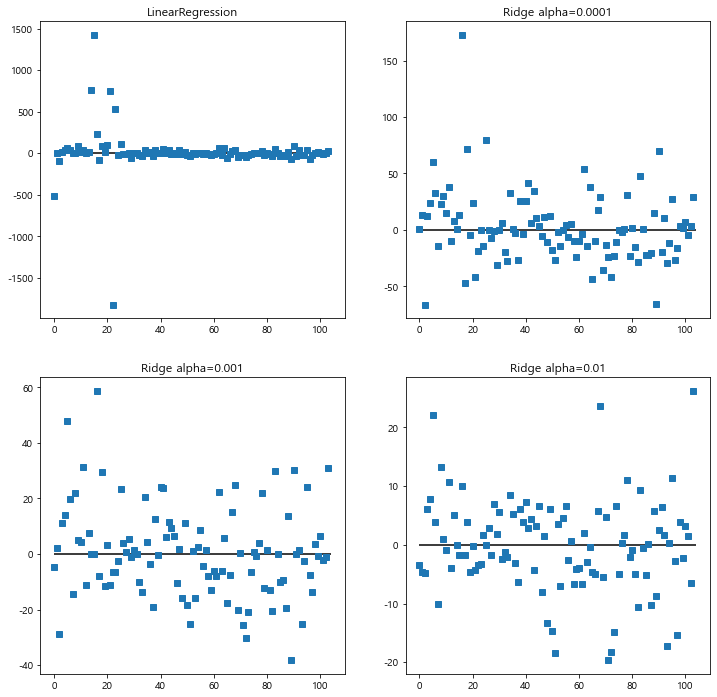

In [17]:
fig = plt.figure(figsize=(12,12))

plt.subplot(2, 2, 1)
plt.hlines(0,0, len(lr.coef_))
plt.plot(lr.coef_, 's', label="LinearRegression")
plt.title('LinearRegression')

plt.subplot(2, 2, 2)
plt.hlines(0,0, len(ridge0001.coef_))
plt.plot(ridge0001.coef_, 's', label="Ridge alpha=0.0001")
plt.title('Ridge alpha=0.0001')

plt.subplot(2, 2, 3)
plt.hlines(0,0, len(ridge001.coef_))
plt.plot(ridge001.coef_, 's', label="Ridge alpha=0.001")
plt.title('Ridge alpha=0.001')

plt.subplot(2, 2, 4)
plt.hlines(0,0, len(ridge01.coef_))
plt.plot(ridge01.coef_, 's', label="Ridge alpha=0.01")
plt.title('Ridge alpha=0.01')

### mglearn을 이용하여 훈련 데이터의 크기를 변화시키며 학습 곡선 확인해보기

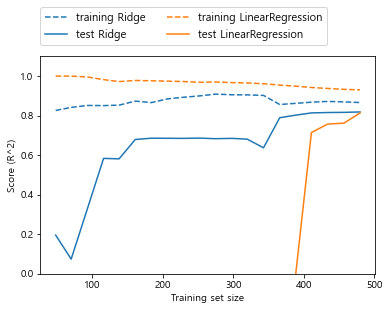

In [18]:
mglearn.plots.plot_ridge_n_samples()

### 라쏘

In [19]:
from sklearn.linear_model import Lasso
import numpy as np


#### 실습 1-4
* Lasso에 alpha를 0.001, 0.01, 0.1, 1, 10에 대한 결정계수의 값 확인
* 모델의 변수가 각각 몇개씩 남는지 확인

In [20]:
lasso0001 = Lasso(alpha = 0.001, max_iter=100000).fit(X_train, y_train)
print("훈련 데이터 세트 점수 : ", lasso0001.score(X_train, y_train))
print("테스트 데이터 세트 점수 : ", lasso0001.score(X_test, y_test))
print("사용한 특성의 수: ", np.sum(lasso0001.coef_ != 0))

훈련 데이터 세트 점수 :  0.932775860689822
테스트 데이터 세트 점수 :  0.8180643704626347
사용한 특성의 수:  73


In [21]:
lasso001 = Lasso(alpha = 0.01, max_iter=100000).fit(X_train, y_train)
print("훈련 데이터 세트 점수 : ", lasso001.score(X_train, y_train))
print("테스트 데이터 세트 점수 : ", lasso001.score(X_test, y_test))
print("사용한 특성의 수: ", np.sum(lasso001.coef_ != 0))

훈련 데이터 세트 점수 :  0.8864717420585476
테스트 데이터 세트 점수 :  0.8036004116583615
사용한 특성의 수:  34


In [22]:
lasso01 = Lasso(alpha = 0.1, max_iter=100000).fit(X_train, y_train)
print("훈련 데이터 세트 점수 : ", lasso01.score(X_train, y_train))
print("테스트 데이터 세트 점수 : ", lasso01.score(X_test, y_test))
print("사용한 특성의 수: ", np.sum(lasso01.coef_ != 0))

훈련 데이터 세트 점수 :  0.7471467575228325
테스트 데이터 세트 점수 :  0.6986891802234085
사용한 특성의 수:  12


In [23]:
lasso1 = Lasso(alpha = 1, max_iter=100000).fit(X_train, y_train)
print("훈련 데이터 세트 점수 : ", lasso1.score(X_train, y_train))
print("테스트 데이터 세트 점수 : ", lasso1.score(X_test, y_test))
print("사용한 특성의 수: ", np.sum(lasso1.coef_ != 0))

훈련 데이터 세트 점수 :  0.26783778369518485
테스트 데이터 세트 점수 :  0.2599232118344591
사용한 특성의 수:  3


In [24]:
lasso10 = Lasso(alpha = 10, max_iter=100000).fit(X_train, y_train)
print("훈련 데이터 세트 점수 : ", lasso10.score(X_train, y_train))
print("테스트 데이터 세트 점수 : ", lasso10.score(X_test, y_test))
print("사용한 특성의 수: ", np.sum(lasso10.coef_ != 0))

훈련 데이터 세트 점수 :  0.0
테스트 데이터 세트 점수 :  -0.03189647654769301
사용한 특성의 수:  0


In [26]:
alpha_p = [0.0001, 0.001, 0.01, 0.1, 1, 10]

for p in alpha_p:
    lasso = Lasso(alpha=p).fit(X_train, y_train)
    tr_score = lasso.score(X_train, y_train)
    test_score = lasso.score(X_test, y_test)
    print("alpha : {} 학습 : {}, 테스트 : {}".format(p, tr_score, test_score))
    print("유효한 feature 개수 : {}", np.sum(lasso.coef_ !=0))

alpha : 0.0001 학습 : 0.9374330725382051, 테스트 : 0.7764741268470517
유효한 feature 개수 : {} 102
alpha : 0.001 학습 : 0.9296864690381805, 테스트 : 0.8141500652221183
유효한 feature 개수 : {} 76
alpha : 0.01 학습 : 0.8865033777946089, 테스트 : 0.80359225764207
유효한 feature 개수 : {} 34
alpha : 0.1 학습 : 0.7471467575228325, 테스트 : 0.6986891802234085
유효한 feature 개수 : {} 12
alpha : 1 학습 : 0.26783778369518485, 테스트 : 0.2599232118344591
유효한 feature 개수 : {} 3
alpha : 10 학습 : 0.0, 테스트 : -0.03189647654769301
유효한 feature 개수 : {} 0


C:\Users\sonjuri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1061.5581359471444, tolerance: 3.361037625329815
  model = cd_fast.enet_coordinate_descent(
C:\Users\sonjuri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 864.3796550250048, tolerance: 3.361037625329815
  model = cd_fast.enet_coordinate_descent(
C:\Users\sonjuri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.848133364149362, tolerance: 3.361037625329815
  model = cd_fast.enet_coordinate_descent(


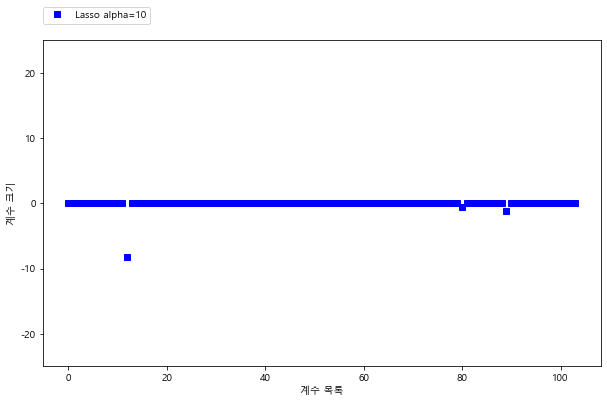

In [32]:
lasso1 = Lasso(alpha = 1).fit(X_train, y_train)

plt.figure(figsize=(10,6))
plt.plot(lasso1.coef_,"bs", label = "Lasso alpha=10")

plt.xlabel("계수 목록")
plt.ylabel("계수 크기")
plt.ylim(-25, 25)
plt.legend(ncol=2, loc=(0, 1.05))
plt.show()

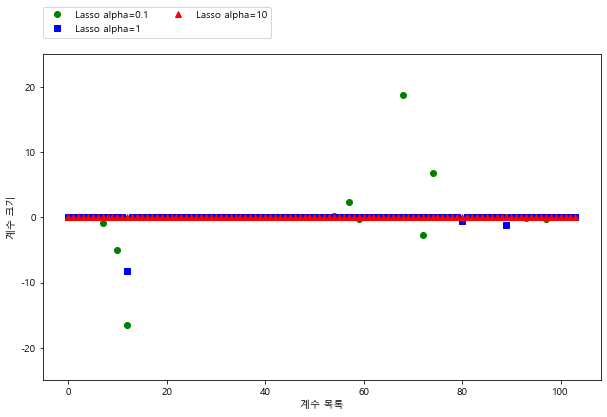

In [33]:
lasso01 = Lasso(alpha=0.1).fit(X_train, y_train)
lasso1 = Lasso(alpha=1).fit(X_train, y_train)
lasso10 = Lasso(alpha=10, max_iter=100000).fit(X_train, y_train)

plt.figure(figsize=(10,6))
plt.plot(lasso01.coef_, "go", label="Lasso alpha=0.1")
plt.plot(lasso1.coef_, "bs", label="Lasso alpha=1")
plt.plot(lasso10.coef_, "r^", label="Lasso alpha=10")

plt.xlabel("계수 목록")
plt.ylabel("계수 크기")
plt.ylim(-25, 25)
plt.legend(ncol=2, loc=(0,1.05))
plt.show()


### 분류형 선형 모델

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

In [36]:
X, y = mglearn.datasets.make_forge()
print(X.shape, y.shape)
print(X[:5], y[:5])  # 5개 데이터


(26, 2) (26,)
[[ 9.96346605  4.59676542]
 [11.0329545  -0.16816717]
 [11.54155807  5.21116083]
 [ 8.69289001  1.54322016]
 [ 8.1062269   4.28695977]] [1 0 1 0 0]


C:\Users\sonjuri\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


C:\Users\sonjuri\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


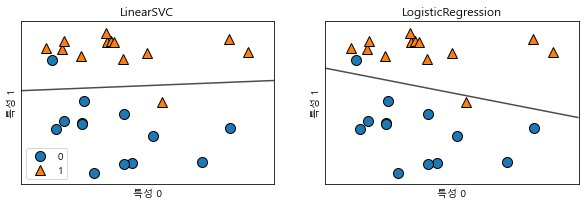

In [37]:
fig, axes = plt.subplots(1, 2, figsize=(10,3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=0.7)
    mglearn.discrete_scatter(X[:,0], X[:,1], y, ax=ax)
    ax.set_title(clf. __class__.__name__)
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
axes[0].legend()


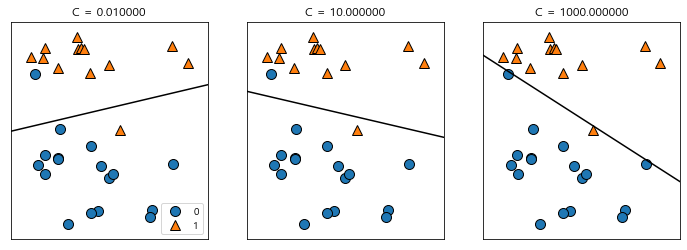

In [38]:
###
mglearn.plots.plot_linear_svc_regularization()

In [39]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                   stratify = cancer.target,
                                                    random_state = 42)
logreg = LogisticRegression(C=1).fit(X_train, y_train)

print("학습용 세트 점수 : {:.3f}".format(logreg.score(X_train, y_train)))
print("테스트 세트 점수 : {:.3f}".format(logreg.score(X_test, y_test)))

학습용 세트 점수 : 0.941
테스트 세트 점수 : 0.965


C:\Users\sonjuri\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 실습 2-4
* C의 값을 변경해 가면서 0.0001, 0.001, 0.01, 0.1, 1, 1에 대하여 정확도를 확인해 보자.


In [42]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                   stratify = cancer.target,
                                                    random_state = 42)
logreg = LogisticRegression(C=0.1).fit(X_train, y_train)

print("학습용 세트 점수 : {:.3f}".format(logreg.score(X_train, y_train)))
print("테스트 세트 점수 : {:.3f}".format(logreg.score(X_test, y_test)))

학습용 세트 점수 : 0.937
테스트 세트 점수 : 0.951


C:\Users\sonjuri\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [43]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                   stratify = cancer.target,
                                                    random_state = 42)
logreg = LogisticRegression(C=0.01).fit(X_train, y_train)

print("학습용 세트 점수 : {:.3f}".format(logreg.score(X_train, y_train)))
print("테스트 세트 점수 : {:.3f}".format(logreg.score(X_test, y_test)))

학습용 세트 점수 : 0.937
테스트 세트 점수 : 0.930


C:\Users\sonjuri\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [47]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                   stratify = cancer.target,
                                                    random_state = 42)
logreg = LogisticRegression(C=0.001).fit(X_train, y_train)

print("학습용 세트 점수 : {:.3f}".format(logreg.score(X_train, y_train)))
print("테스트 세트 점수 : {:.3f}".format(logreg.score(X_test, y_test)))

학습용 세트 점수 : 0.951
테스트 세트 점수 : 0.944


C:\Users\sonjuri\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [46]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                   stratify = cancer.target,
                                                    random_state = 42)
logreg = LogisticRegression(C=0.0001).fit(X_train, y_train)

print("학습용 세트 점수 : {:.3f}".format(logreg.score(X_train, y_train)))
print("테스트 세트 점수 : {:.3f}".format(logreg.score(X_test, y_test)))

학습용 세트 점수 : 0.930
테스트 세트 점수 : 0.930


C:\Users\sonjuri\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [48]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                   stratify = cancer.target,
                                                    random_state = 42)
logreg = LogisticRegression(C=10).fit(X_train, y_train)

print("학습용 세트 점수 : {:.3f}".format(logreg.score(X_train, y_train)))
print("테스트 세트 점수 : {:.3f}".format(logreg.score(X_test, y_test)))

학습용 세트 점수 : 0.958
테스트 세트 점수 : 0.958


C:\Users\sonjuri\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [49]:
c_param = [0.0001, 0.001, 0.01, 0.1, 1, 10]

for p in c_param:
    lrreg = LogisticRegression(C=p).fit(X_train, y_train)
    tr_score = lrreg.score(X_train, y_train)
    test_score = lrreg.score(X_test, y_test)
    print("C : {} 학습 : {}, 테스트 : {}".format(p,tr_score, test_score))
    print("유효한 feature 개수 : ", np.sum(lrreg.coef_ !=0))


C:\Users\sonjuri\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\sonjuri\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

C : 0.0001 학습 : 0.9295774647887324, 테스트 : 0.9300699300699301
유효한 feature 개수 :  30
C : 0.001 학습 : 0.9507042253521126, 테스트 : 0.9440559440559441
유효한 feature 개수 :  30
C : 0.01 학습 : 0.9366197183098591, 테스트 : 0.9300699300699301
유효한 feature 개수 :  30
C : 0.1 학습 : 0.9366197183098591, 테스트 : 0.951048951048951
유효한 feature 개수 :  30
C : 1 학습 : 0.9413145539906104, 테스트 : 0.965034965034965
유효한 feature 개수 :  30
C : 10 학습 : 0.9577464788732394, 테스트 : 0.958041958041958
유효한 feature 개수 :  30


C:\Users\sonjuri\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\sonjuri\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

C:\Users\sonjuri\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\sonjuri\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

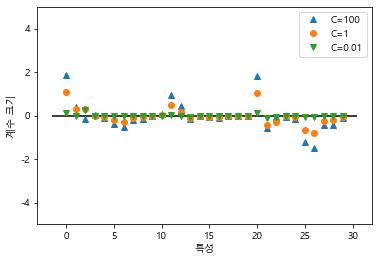

In [50]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
logreg = LogisticRegression(C=1).fit(X_train, y_train)
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)

plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg001.coef_.T, 'v', label="C=0.01")

xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])

plt.ylim(-5, 5)
plt.xlabel("특성")
plt.ylabel("계수 크기")
plt.legend()


C:\Users\sonjuri\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sonjuri\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\sonjuri\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modul

C=0.001 인 l1 로지스틱 회귀의 훈련 정확도: 0.94
C=0.001 인 l1 로지스틱 회귀의 테스트 정확도: 0.95
C=1.000 인 l1 로지스틱 회귀의 훈련 정확도: 0.94
C=1.000 인 l1 로지스틱 회귀의 테스트 정확도: 0.95
C=100.000 인 l1 로지스틱 회귀의 훈련 정확도: 0.94
C=100.000 인 l1 로지스틱 회귀의 테스트 정확도: 0.95


C:\Users\sonjuri\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sonjuri\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


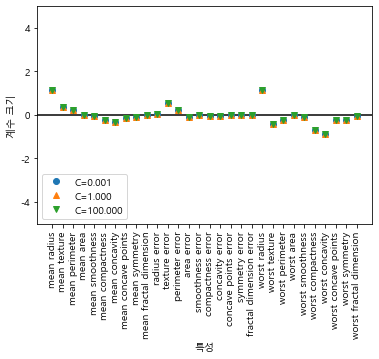

In [51]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, 
                               penalty="none",
                               solver='lbfgs',
                               max_iter=100).fit(X_train, y_train)
    print("C={:.3f} 인 l1 로지스틱 회귀의 훈련 정확도: {:.2f}".format(
          C, lr_l1.score(X_train, y_train)))
    print("C={:.3f} 인 l1 로지스틱 회귀의 테스트 정확도: {:.2f}".format(
          C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.xlabel("특성")
plt.ylabel("계수 크기")

plt.ylim(-5, 5)
plt.legend(loc=3)


In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import mglearn
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC


In [53]:
from sklearn.datasets import make_blobs
X, y = make_blobs(random_state=42)
print(X.shape, y.shape)
print(X[:5], y[:5])

(100, 2) (100,)
[[-7.72642091 -8.39495682]
 [ 5.45339605  0.74230537]
 [-2.97867201  9.55684617]
 [ 6.04267315  0.57131862]
 [-6.52183983 -6.31932507]] [2 1 0 1 2]


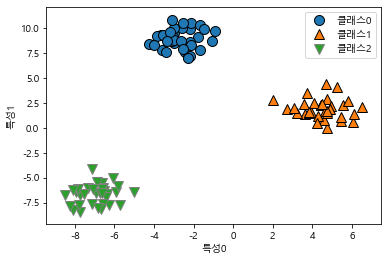

In [54]:
mglearn.discrete_scatter(X[:, 0], X[:,1], y)
plt.xlabel("특성0")
plt.ylabel("특성1")
plt.legend(["클래스0", "클래스1", "클래스2"])

In [56]:
linear_svm = LinearSVC().fit(X,y)
print("계수 배열의 크기:", linear_svm.coef_.shape)
print("절편 배열의 크기:", linear_svm.intercept_.shape)

계수 배열의 크기: (3, 2)
절편 배열의 크기: (3,)


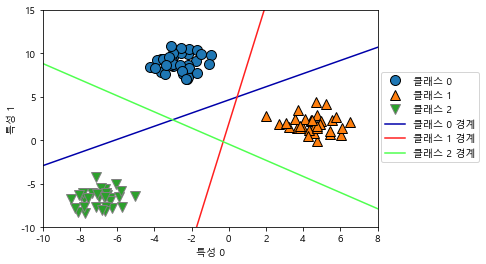

In [57]:
mglearn.discrete_scatter( X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)

for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)

plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

label_list = ['클래스 0', '클래스 1', '클래스 2', 
              '클래스 0 경계', '클래스 1 경계', '클래스 2 경계']

plt.legend(label_list, loc=(1.01, 0.3))

In [60]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import seaborn as sns

In [63]:
cancer = load_breast_cancer()
all_X = cancer.data
all_y = cancer.target

In [64]:
X_train, X_test, y_train, y_test = train_test_split(all_X,
                                                   all_y,
                                                   stratify=all_y,
                                                   test_size=0.3,
                                                   random_state=77)

In [68]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
pred = model.predict(X_test)


In [69]:
np.sum(pred==y_test)/len(pred)

0.9064327485380117

In [70]:
def testTreeModel(TestSize=0.3):
    cancer = load_breast_cancer()
    all_X = cancer.data
    all_Y = cancer.target
    X_train, X_test, y_train, y_test = train_test_split(all_X, 
                                                    all_Y, 
                                                    stratify=cancer.target, 
                                                    test_size = TestSize,
                                                    random_state=77)
    
    tree = DecisionTreeClassifier(random_state=0)
    tree.fit(X_train, y_train)
    print("학습용 세트 정확도 : {:.3f}".format(tree.score(X_train, y_train)))
    print("테스트 세트 정확도 : {:.3f}".format(tree.score(X_test, y_test)))


In [71]:
testTreeModel(0.3)  # 테스트 사이즈 30%
testTreeModel(0.1)  # 테스트 사이즈 10%
testTreeModel(0.2)  # 테스트 사이즈 20%


학습용 세트 정확도 : 1.000
테스트 세트 정확도 : 0.918
학습용 세트 정확도 : 1.000
테스트 세트 정확도 : 0.912
학습용 세트 정확도 : 1.000
테스트 세트 정확도 : 0.912


* max_depth: tree의 깊이
* max_leaf_nodes: leaf의 최대 노드 개수 제한
* min_samples_leaf: 노드 분할을 위한 데이터 최소 개수 지정

In [80]:
def testTreeModel(TestSize=0.3, treedepth=3):
    cancer = load_breast_cancer()
    X_train, X_test, y_train, y_test = train_test_split(all_X, all_y,
                                                       stratify=all_y,
                                                       test_size=TestSize,
                                                       random_state=77)
    tree=DecisionTreeClassifier(max_depth = treedepth, random_state=0)
    tree.fit(X_train, y_train)
    print("test_size: {}, tree depth : {}".format(TestSize, treedepth))
    print("학습용 데이터 셋 정확도: {:.3f}".format(tree.score(X_train, y_train)))
    print("테스트 데이터 셋 정확도 : {:.3f}".format(tree.score(X_test, y_test)))

In [81]:
for i in range(1,8):
    testTreeModel(0.3, i)

test_size: 0.3, tree depth : 1
학습용 데이터 셋 정확도: 0.932
테스트 데이터 셋 정확도 : 0.883
test_size: 0.3, tree depth : 2
학습용 데이터 셋 정확도: 0.972
테스트 데이터 셋 정확도 : 0.912
test_size: 0.3, tree depth : 3
학습용 데이터 셋 정확도: 0.982
테스트 데이터 셋 정확도 : 0.906
test_size: 0.3, tree depth : 4
학습용 데이터 셋 정확도: 0.985
테스트 데이터 셋 정확도 : 0.906
test_size: 0.3, tree depth : 5
학습용 데이터 셋 정확도: 0.992
테스트 데이터 셋 정확도 : 0.889
test_size: 0.3, tree depth : 6
학습용 데이터 셋 정확도: 0.997
테스트 데이터 셋 정확도 : 0.901
test_size: 0.3, tree depth : 7
학습용 데이터 셋 정확도: 0.997
테스트 데이터 셋 정확도 : 0.912


In [82]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(all_X, 
                                                    all_y, 
                                                    stratify=cancer.target, 
                                                    test_size = 0.4,
                                                    random_state=77)
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=4, random_state=0)

In [83]:
### 특성의 중요도
tree.feature_importances_


array([0.0239665 , 0.01192999, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.75783797, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.0024902 ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.01801738, 0.08082945, 0.06412899, 0.        ,
       0.        , 0.01988332, 0.        , 0.02091622, 0.        ])

In [84]:
def plot_feature_imp(model, n_features):
    n_features = cancer.data.shape[1]
    imp = model.feature_importances_
    plt.barh(range(n_features) , imp, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    
    plt.xlabel("특성 중요도")
    plt.ylabel("특성")
    plt.ylim(-1, n_features)


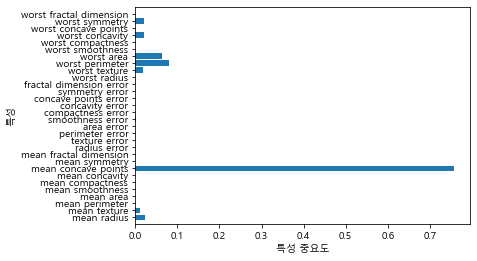

In [85]:
plot_feature_imp(tree,30)